In [100]:
import pandas as pd 
import numpy as np 

from matplotlib import rc
import matplotlib.font_manager as fm

fm._rebuild()
fm.get_fontconfig_fonts()

# 디렉토리 및 파일 이름에 맞추어 변경
font_location = 'C:/Windows/Fonts/malgun.ttf'

font_name = fm.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)

In [3]:
cctv_seoul = pd.read_csv('../csv-data/cctv_seoul.csv', encoding='utf-8')
cctv_seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [4]:
cctv_seoul.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [5]:
cctv_seoul.columns[0]

'기관명'

In [6]:
cctv_seoul.rename(columns={cctv_seoul.columns[0]:'구별'}, inplace=True)

In [7]:
cctv_seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [8]:
pop_seoul = pd.read_excel('../csv-data/pop_seoul.xls',
                          header=2,
                          usecols='B, D, G, J, N'
                          )
pop_seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [9]:
cctv_seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [10]:
# cctv가 제일 많이 설치되어 있는 구, 제일 적게 설치되어 있는 구를 순서대로 정렬 
cctv_seoul.sort_values(by = '소계').head() #ascending(오름차순, 작->큰)

,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,485,238,159,42,386
12,마포구,574,314,118,169,379
17,송파구,618,529,21,68,463
24,중랑구,660,509,121,177,109
23,중구,671,413,190,72,348


In [11]:
cctv_seoul.sort_values(by='소계').tail()

,구별,소계,2013년도 이전,2014년,2015년,2016년
20,용산구,1624,1368,218,112,398
21,은평구,1873,1138,224,278,468
14,서초구,1930,1406,157,336,398
18,양천구,2034,1843,142,30,467
0,강남구,2780,1292,430,584,932


In [12]:
cctv_seoul.sort_values(by='소계', ascending=False).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
18,양천구,2034,1843,142,30,467
14,서초구,1930,1406,157,336,398
21,은평구,1873,1138,224,278,468
20,용산구,1624,1368,218,112,398


In [13]:
cctv_seoul.sort_values(by = '소계', ascending=False).tail()

,구별,소계,2013년도 이전,2014년,2015년,2016년
23,중구,671,413,190,72,348
24,중랑구,660,509,121,177,109
17,송파구,618,529,21,68,463
12,마포구,574,314,118,169,379
9,도봉구,485,238,159,42,386


In [14]:
#인구수 컬럼을 '구별', '인구수', '한국인','외국인', '고령자'
pop_seoul.rename(columns={pop_seoul.columns[0]:'구별', 
                          pop_seoul.columns[1]:'인구수', 
                          pop_seoul.columns[2]:'한국인',
                          pop_seoul.columns[3]:'외국인',
                          pop_seoul.columns[4]:'고령자'}, inplace=True)
#cctv_seoul.rename(columns={cctv_seoul.columns[0]:'구별'}, inplace=True)

In [15]:
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [16]:
pop_seoul.columns = ['구별','인구수','한국인','외국인','고령자'] #여러개 컬럼 고칠 때 

In [17]:
#'합계'라고 되어있는 행을 삭제 
pop_seoul.drop([0], inplace=True)
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [18]:
pop_seoul.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 1 to 26
Data columns (total 5 columns):
구별     25 non-null object
인구수    25 non-null float64
한국인    25 non-null float64
외국인    25 non-null float64
고령자    25 non-null float64
dtypes: float64(4), object(1)
memory usage: 1.2+ KB


In [19]:
pop_seoul['구별']

1      종로구
2       중구
3      용산구
4      성동구
5      광진구
6     동대문구
7      중랑구
8      성북구
9      강북구
10     도봉구
11     노원구
12     은평구
13    서대문구
14     마포구
15     양천구
16     강서구
17     구로구
18     금천구
19    영등포구
20     동작구
21     관악구
22     서초구
23     강남구
24     송파구
25     강동구
26     NaN
Name: 구별, dtype: object

In [20]:
len(pop_seoul['구별'].unique())

26

In [21]:
pop_seoul.iloc[25]

구별     NaN
인구수    NaN
한국인    NaN
외국인    NaN
고령자    NaN
Name: 26, dtype: object

In [22]:
pop_seoul.isnull().sum()

구별     1
인구수    1
한국인    1
외국인    1
고령자    1
dtype: int64

In [23]:
pop_seoul['구별'].isnull().sum()

1

In [24]:
pop_seoul.drop([26], inplace=True)

In [25]:
pop_seoul.isnull().sum()

구별     0
인구수    0
한국인    0
외국인    0
고령자    0
dtype: int64

In [26]:
pop_seoul['외국인비율'] = pop_seoul['외국인']/pop_seoul['인구수']*100
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852


In [27]:
pop_seoul['고령자비율'] = pop_seoul['고령자']/pop_seoul['인구수']*100
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849


In [28]:
pop_seoul.sort_values(by='인구수', ascending=False).head() #체인식 코딩

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
23,강남구,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [29]:
pop_seoul.sort_values(by='인구수', ascending=False).tail()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909


In [30]:
pop_seoul.sort_values(by='고령자비율', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
13,서대문구,327163.0,314982.0,12181.0,48161.0,3.723221,14.720797


In [31]:
pop_seoul.sort_values(by='고령자비율', ascending=False).tail()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
22,서초구,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849
23,강남구,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
15,양천구,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599


In [32]:
cctv_seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [33]:
#최근 증가율이 높은곳 /낮은 곳 
cctv_seoul['최근증가율'] = ( cctv_seoul['2014년']+
                             cctv_seoul['2015년']+
                             cctv_seoul['2016년']
                            )/cctv_seoul['2013년도 이전']*100 
cctv_seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,2780,1292,430,584,932,150.619195
1,강동구,773,379,99,155,377,166.490765
2,강북구,748,369,120,138,204,125.203252
3,강서구,884,388,258,184,81,134.793814
4,관악구,1496,846,260,390,613,149.290780


In [34]:
cctv_seoul.sort_values(by='최근증가율', ascending=False).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1002,464,314,211,630,248.922414
9,도봉구,485,238,159,42,386,246.638655
12,마포구,574,314,118,169,379,212.101911
8,노원구,1265,542,57,451,516,188.929889
1,강동구,773,379,99,155,377,166.490765


In [35]:
data_result = pd.merge(cctv_seoul, pop_seoul, on = '구별')
data_result

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,379,99,155,377,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,369,120,138,204,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,388,258,184,81,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,846,260,390,613,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
5,광진구,707,573,78,53,174,53.228621,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849
6,구로구,1561,1142,173,246,323,64.973730,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
7,금천구,1015,674,51,269,354,100.000000,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
8,노원구,1265,542,57,451,516,188.929889,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
9,도봉구,485,238,159,42,386,246.638655,348646.0,346629.0,2017.0,51312.0,0.578524,14.717507


In [36]:
data_result.drop(columns=['2013년도 이전','2014년','2015년','2016년'],inplace=True)
data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [37]:
# del data_result['2014년']=>한 피쳐 (열)삭제 시 편함 
#df.drop(columns = [컬럼명, 컬럼명]) =>여러 개의 피쳐 삭제 시 편함 

In [38]:
type(data_result['구별'].unique())

numpy.ndarray

In [39]:
data_result['구별'].unique() #ndarray는 1차원리스트나 2차원리스트나 3차원리스트를 다루기 위한
                            #객체 

array(['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구',
       '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구'], dtype=object)

In [40]:
#1차원 ndarray객체는 1차원 list이므로, list처럼 다루면 됨. 
len(data_result['구별'].unique())

25

In [41]:
data_result.head()
#reset_index(): 현재 index로 잡혀져 있는 정수값이 df의 병합과
#               처리로 인해 순서대로 들어있지 않은 경우, 다시 순서대로 인덱싱되도록 함. 
#               a_df_index = [1,2,3] , b_df_index = [1,2,3]
#               a_df_index + b+df+index인 결과는 [1,2,3,1,2,3] 중복된 값! 
#               reset_index()후 [0,1,2,3,4,5]
#set_index(): 특정한 unique한 값을 가지는 컬럼을 index로 설정하고자 하는 경우 

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [42]:
#많은 함수들이 인덱스를 기준으로 처리 됨. 
data_result.set_index('구별', inplace=True)

In [43]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [44]:
#고령자비율, 소계의 상관관계 
old = np.corrcoef(data_result['고령자비율'],data_result['소계'])
old
#고령자 비율이 높은 지역이cctv가 많이 설치되었다고 일반적으로 말할 수 없다. 
#고령자비율과 cctv설치 수는 약간 음의 상관이 있긴 함. 

array([[ 1.        , -0.28078554],
       [-0.28078554,  1.        ]])

In [45]:
#외국인비율, 소계의 상관관계 
out = np.corrcoef(data_result['외국인비율'], data_result['소계'])
out
#10프로에 가까운 수치므로 외국인비율과 소계는 거의 상관이 없음 
#외국인이 높은 구가 cctv가 많이/적게 설치되어있다라고 할 수 없음. 

array([[ 1.        , -0.13607433],
       [-0.13607433,  1.        ]])

In [46]:
#인구수, 소계의 상관관계 
tot_pop = np.corrcoef(data_result['인구수'], data_result['소계'])
tot_pop

array([[1.        , 0.30634228],
       [0.30634228, 1.        ]])

In [47]:
type(tot_pop)

numpy.ndarray

In [48]:
#세가지의 상관도를 그래프로 비교해보고 싶음. 

In [49]:
import seaborn as sns

In [50]:
corr= data_result.corr() #피어슨 상관관계 
corr 

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
소계,1.000000,-0.343016,0.306342,0.304287,-0.023786,0.255196,-0.136074,-0.280786
최근증가율,-0.343016,1.000000,-0.093068,-0.082511,-0.150463,-0.070969,-0.044042,0.185089
인구수,0.306342,-0.093068,1.000000,0.998061,-0.153371,0.932667,-0.591939,-0.669462
한국인,0.304287,-0.082511,0.998061,1.000000,-0.214576,0.931636,-0.637911,-0.660812
외국인,-0.023786,-0.150463,-0.153371,-0.214576,1.000000,-0.155381,0.838904,-0.014055
고령자,0.255196,-0.070969,0.932667,0.931636,-0.155381,1.000000,-0.606088,-0.380468
외국인비율,-0.136074,-0.044042,-0.591939,-0.637911,0.838904,-0.606088,1.000000,0.267348
고령자비율,-0.280786,0.185089,-0.669462,-0.660812,-0.014055,-0.380468,0.267348,1.000000


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49548 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 52572 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51613 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44032 missing from c

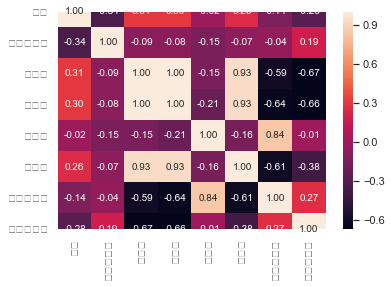

In [51]:
#cctv설치와 제일 상관있는 항목은 무엇인가요? 
t_cols = ['소계','최근증가율','인구수','한국인','외국인','고령자','외국인비율','고령자비율']
sns.set(font_scale=1.0)
heatmap = sns.heatmap(corr.values,
                      cbar = True,
                      annot = True,
                     # square = True,
                      fmt = '.2f',
                      annot_kws = {'size':10},
                      xticklabels = t_cols,
                      yticklabels = t_cols
                     )

In [52]:
#cctv설치와 제일 상관있는 항목은 '인구수'가 제일 cctv설치 수와 상관이 있는 것으로 보임. 

In [53]:
#최근증가율과 소계의 상관관계 
np.corrcoef(data_result['최근증가율'], data_result['소계'])

array([[ 1.      , -0.343016],
       [-0.343016,  1.      ]])

In [54]:
list(pop_seoul['인구수'])

[162820.0,
 133240.0,
 244203.0,
 311244.0,
 372164.0,
 369496.0,
 414503.0,
 461260.0,
 330192.0,
 348646.0,
 569384.0,
 494388.0,
 327163.0,
 389649.0,
 479978.0,
 603772.0,
 447874.0,
 255082.0,
 402985.0,
 412520.0,
 525515.0,
 450310.0,
 570500.0,
 667483.0,
 453233.0]

In [55]:
pop_seoul['인구수'].tolist() ##list(1d)<---Series(1d)

[162820.0,
 133240.0,
 244203.0,
 311244.0,
 372164.0,
 369496.0,
 414503.0,
 461260.0,
 330192.0,
 348646.0,
 569384.0,
 494388.0,
 327163.0,
 389649.0,
 479978.0,
 603772.0,
 447874.0,
 255082.0,
 402985.0,
 412520.0,
 525515.0,
 450310.0,
 570500.0,
 667483.0,
 453233.0]

In [56]:
tot_list = tot_pop.tolist()
tot_list

[[0.9999999999999999, 0.30634227936792635], [0.3063422793679263, 1.0]]

In [57]:
tot_list[0][1]

0.30634227936792635

In [58]:
tot_list[1]

[0.3063422793679263, 1.0]

In [59]:
tot_list[0]

[0.9999999999999999, 0.30634227936792635]

In [60]:
fst_list = [1,2,3] #1ndarray, Series, 1nd list 
fst_list

[1, 2, 3]

In [61]:
fst_list[0] #[열] 

1

In [62]:
#인덱스 : 0부터 시작 
snd_list = [ #열
             [1,2,3], #행
             [4,5,6]  
           ]
#df.values , 행*열 
#행렬(table구조를 가지는 데이터 구조)


In [63]:
snd_list

[[1, 2, 3], [4, 5, 6]]

In [64]:
list(tot_pop)

[array([1.        , 0.30634228]), array([0.30634228, 1.        ])]

In [65]:
tot_list

[[0.9999999999999999, 0.30634227936792635], [0.3063422793679263, 1.0]]

In [66]:
tot_corr = tot_list[0][1]#전체 인구수 상관계수 
tot_corr

0.30634227936792635

In [67]:
#인구수, 소계의 상관관계 tot_pop 
old_corr = old[0][1]
out_corr = out[0][1]

In [68]:
corr_3_list = [tot_corr, old_corr, out_corr]
corr_3_list

[0.30634227936792635, -0.28078553790050065, -0.13607432878194445]

In [69]:
fig = plt.plot(x_data, corr_3_list,'ro')
plt.title('correlation')

NameError: name 'plt' is not defined

NameError: name 'plt' is not defined

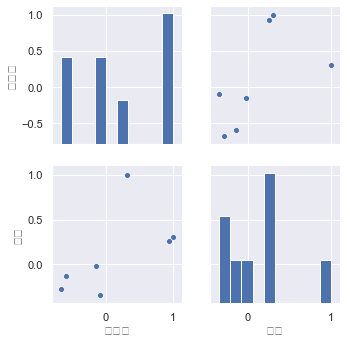

In [70]:
sns.pairplot(corr[['인구수','소계']])
plt.show()

In [74]:
import matplotlib.pyplot as plt 

In [75]:
#강남구의 한국인, 외국인, 고령자 수를 비교할 수 잇게 그래프로 그려보세요. 

In [105]:
data_result

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,cctv비율
구별,,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.487292
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638,0.170552
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342,0.226535
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,0.146413
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291,0.284673
광진구,707,53.228621,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849,0.189970
구로구,1561,64.973730,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506,0.348536
금천구,1015,100.000000,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255,0.397911
노원구,1265,188.929889,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883,0.222170


In [106]:
data_result.iloc[0]

소계          2780.000000
최근증가율        150.619195
인구수       570500.000000
한국인       565550.000000
외국인         4950.000000
고령자        63167.000000
외국인비율          0.867660
고령자비율         11.072217
cctv비율         0.487292
Name: 강남구, dtype: float64

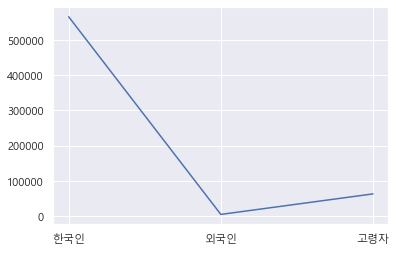

In [107]:
fig = plt.plot(['한국인','외국인','고령자'],[ 565550,4950,63167]) #run all로 안되는 경우도 있어서 직접 한 행을 실행시켜줘야 
plt.show()                                                      #한글이 안 깨지는 경우도 있음. 

In [108]:
data_result

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,cctv비율
구별,,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.487292
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638,0.170552
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342,0.226535
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,0.146413
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291,0.284673
광진구,707,53.228621,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849,0.189970
구로구,1561,64.973730,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506,0.348536
금천구,1015,100.000000,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255,0.397911
노원구,1265,188.929889,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883,0.222170


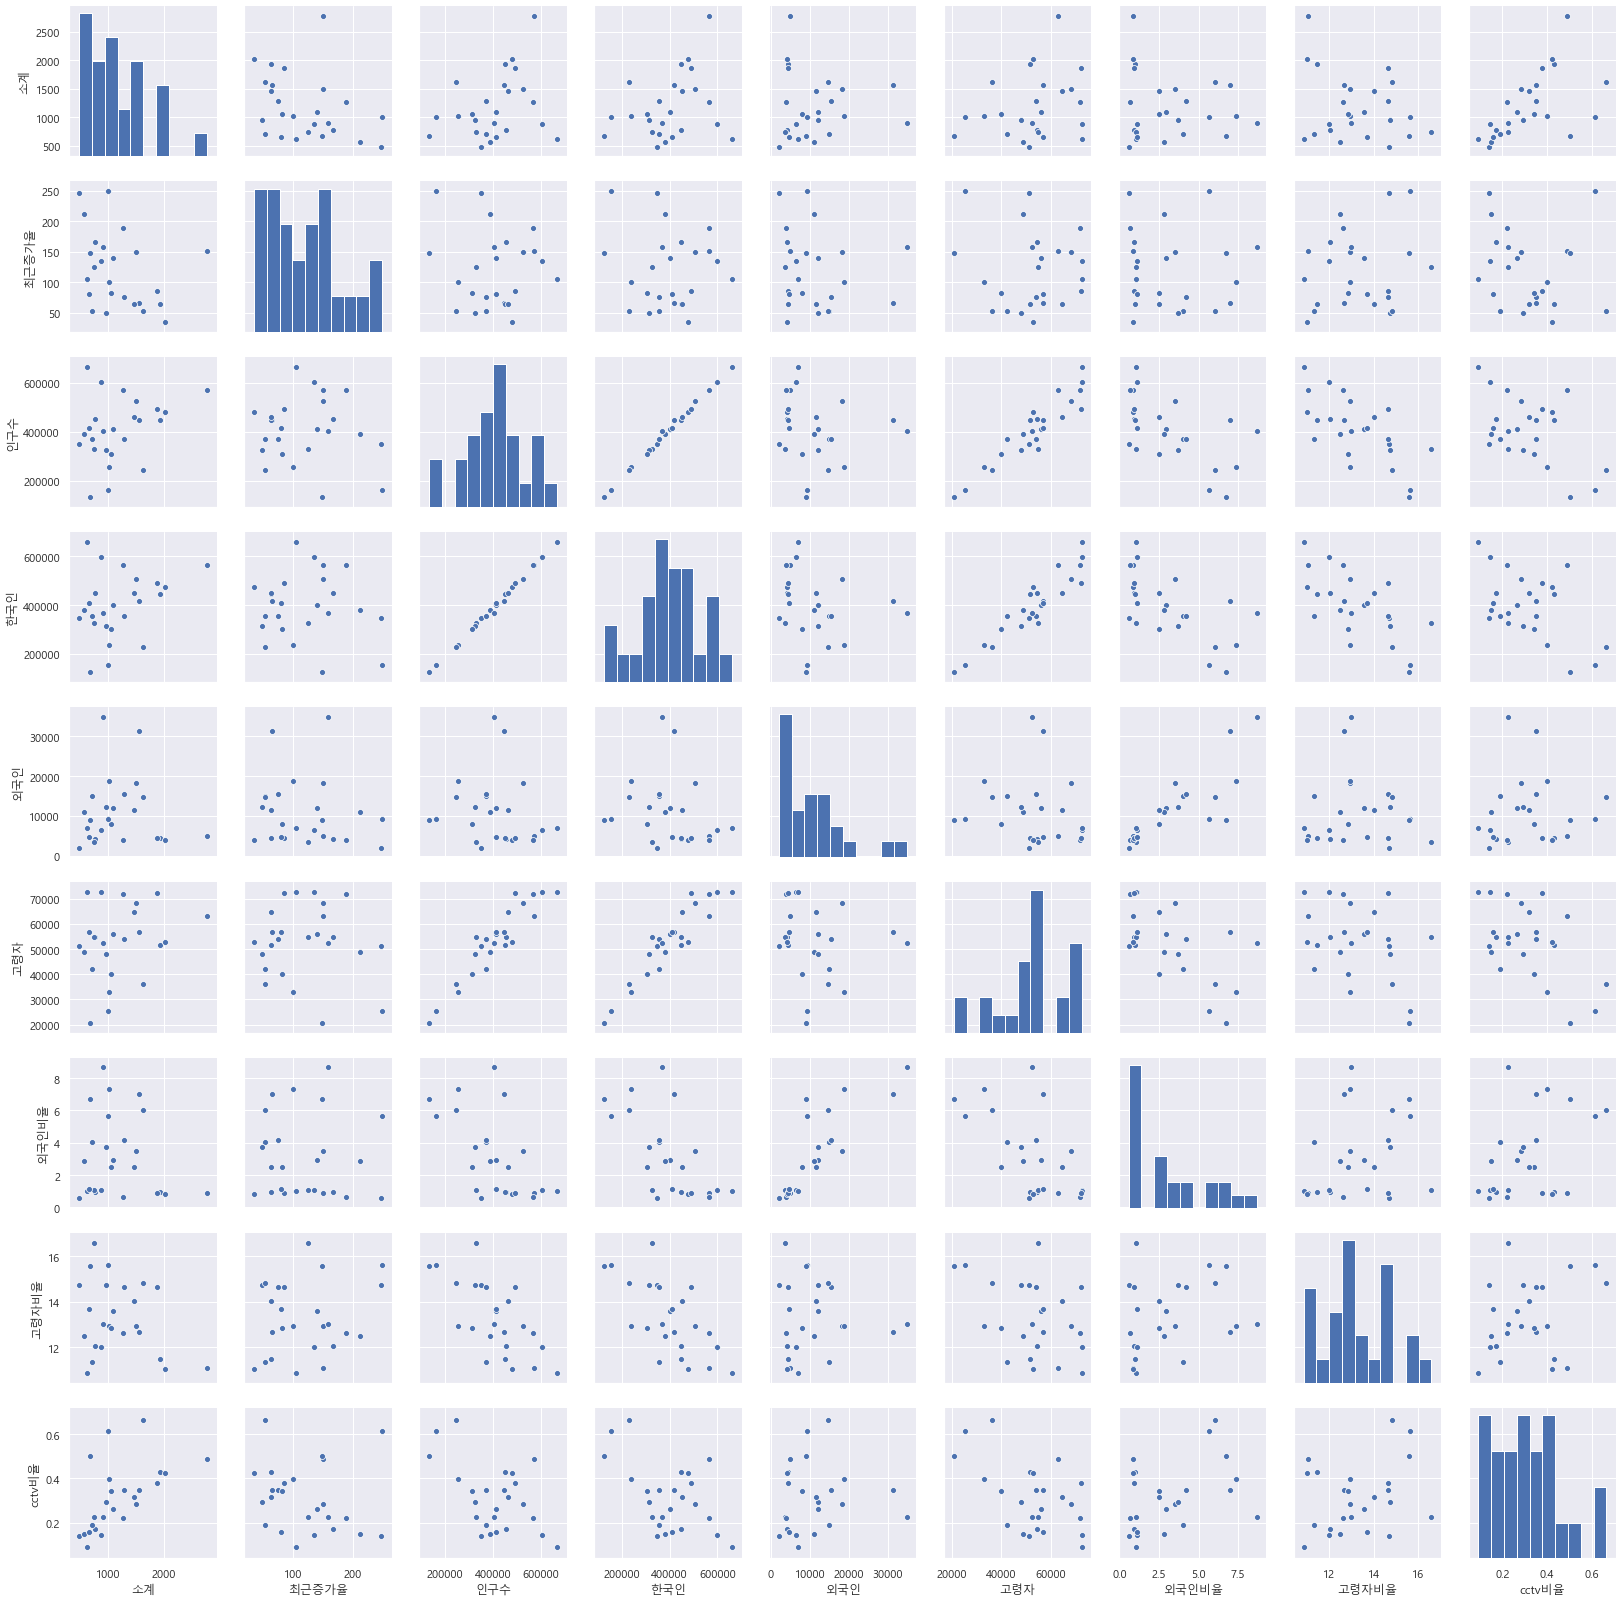

In [109]:
sns.pairplot(data_result)
plt.show()

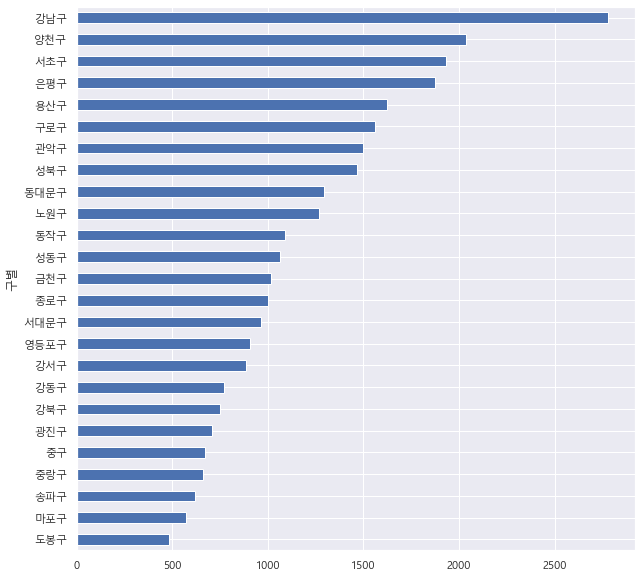

In [110]:
plt.figure()
data_result['소계'].sort_values().plot(kind='barh',grid = True, figsize = (10,10))
plt.show()

In [111]:
#인구당 cctv비율을 구해서 , 정렬후 그래프를 그려보세요. 
data_result['cctv비율'] = data_result['소계']/data_result['인구수']*100
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,cctv비율
구별,,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.487292
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638,0.170552
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342,0.226535
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,0.146413
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291,0.284673


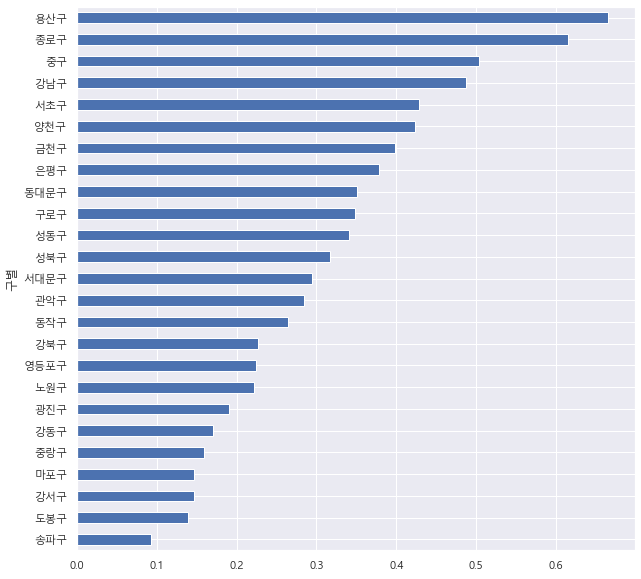

In [112]:
data_result['cctv비율'].sort_values().plot(kind = 'barh',grid = True, figsize = (10,10))

Text(580000, 2800, 'high')

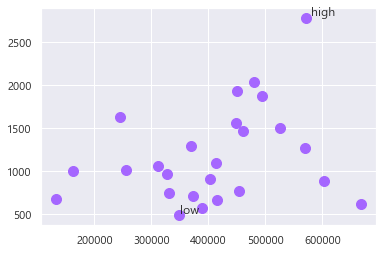

In [113]:
plt.scatter(data_result['인구수'], data_result['소계'], s=100 ,c = '#A566FF')#33FFCE
plt.text(350000,500,'low')
plt.text(580000,2800,'high')

In [114]:
##x, y축으로 사용할 데이터를 주고, 1차방정식으로 표현했을 때 
##기울기와 y절편을 구해보세요. polyfit()
pf1 = np.polyfit(data_result['인구수'],data_result['소계'],1)
pf1 #1차방정식의 기울기와 절편을 구해주세요.

array([1.30916415e-03, 6.45066497e+02])

In [115]:
##위에서 구한 기울기와 절편으로 함수를 만들어주세요. 
f1 = np.poly1d(pf1)
f1

poly1d([1.30916415e-03, 6.45066497e+02])

In [116]:
fx = np.linspace(100000, 700000, 100)
fx[:5]

array([100000.        , 106060.60606061, 112121.21212121, 118181.81818182,
       124242.42424242])

In [118]:
#오차를 구해보자
#판단선의 값들이 필요 => f1(data_result['인구수'])
#현재 값들이 필요 => data_result['소계']

data_result['오차'] = np.abs(data_result['소계']-f1(data_result['인구수']))
df_sort = data_result.sort_values(by = '오차',ascending=False)
df_sort.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,cctv비율,오차
구별,,,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.487292,1388.055355
송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599,0.092587,900.911312
양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964,0.423769,760.563512
서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308,0.428594,695.403794
용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427,0.665020,659.231690


Text(580000, 2800, 'high')

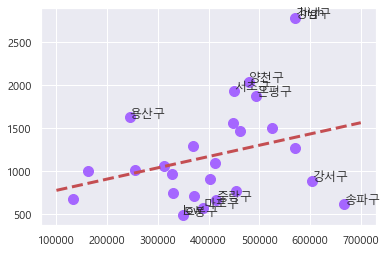

In [119]:
plt.scatter(data_result['인구수'], data_result['소계'], s=100 ,c = '#A566FF')#33FFCE
plt.plot(fx,f1(fx), ls='dashed', lw=3, color = 'r') #직선을 넣을 것이라 plot 
for n in range(10):
    plt.text(df_sort['인구수'][n],
        df_sort['소계'][n],
        df_sort.index[n]
        )


plt.text(350000,500,'low')
plt.text(580000,2800,'high')

In [ ]:
#판단선(회귀선):예측과분류의기준이되는선
#판단선은 방정식, 1차 방정식이라고 한다면 기울기와 절편이 필요 

In [90]:
#위의 그래프는 무엇을 나타내는가 
#현재 서울의 인구수에 따른 cctv 구별 설치 수를 나타낸다. 
#cctv를 어느 구에 설치해야 하는가 
#판단선: 인구수에 적절한 cctv수를 판단하는 선 
#       판단선 위에 위치한 구는 이미 인구수에 비해 cctv가 많이 설치된 구 
#       판단선 아래에 위치한 구는 인구수에 비해 cctv가 설치가 부족한 구 
#       판단선 아래에 있는 구에 cctv를 설치하자 
#       오차가 큰 순으로 ! 먼저 선별하면 될 거 같음 

#왜 그런가 